# Product Demand Prediction using ML

A product company plans to offer discounts on its product during the upcoming holiday season. The company wants find  the price at which its product can be a better deal compared to its competitors.
For this task, the company provided a dataset of past changes in sales based on price changes. You need train a model that can predict the demand for the product in the market with different price segments.


The dataset contains :
1. the product id;
2. store id;
3. total price at which product was sold;
4. base price at which product was sold
5. units sold (quantity demanded)

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Get the data

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv")

In [4]:
data.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [5]:
data.shape

(150150, 5)

In [6]:
# Check the missing values
data.isna().sum()

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

let's drop the missing value since it is insignificant

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

ID             0
Store ID       0
Total Price    0
Base Price     0
Units Sold     0
dtype: int64

### Descriptive Statistics

In [12]:
data.describe()

,ID,Store ID,Total Price,Base Price,Units Sold
count,150149.000000,150149.000000,150149.000000,150149.000000,150149.000000
mean,106270.971795,9199.420935,206.626751,219.424262,51.674543
std,61385.825580,615.593192,103.308516,110.960204,60.207962
min,1.000000,8023.000000,41.325000,61.275000,1.000000
25%,53111.000000,8562.000000,130.387500,133.237500,20.000000
50%,106226.000000,9371.000000,198.075000,205.912500,35.000000
75%,159452.000000,9731.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,562.162500,562.162500,2876.000000


### Let's visualize the dataset

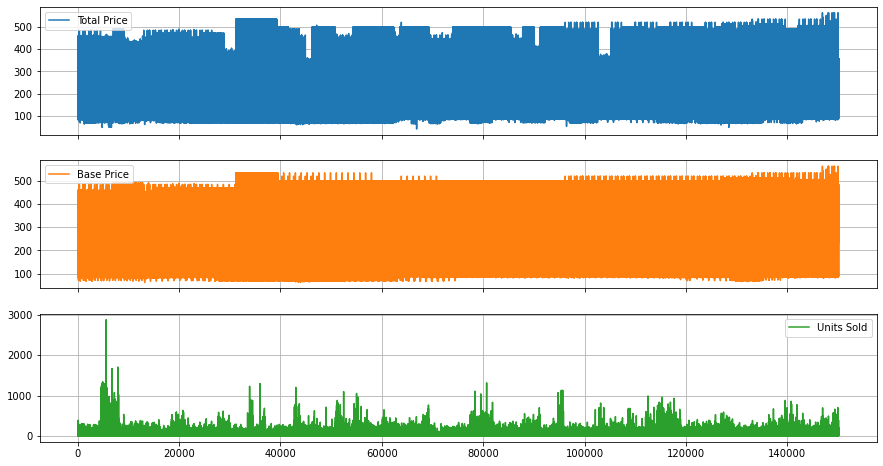

In [13]:
data[['Total Price','Base Price','Units Sold']].plot(subplots=True, grid=True, figsize=(15,8))
plt.show()

### Correlation between Total Price, Base Price and Unit Sold

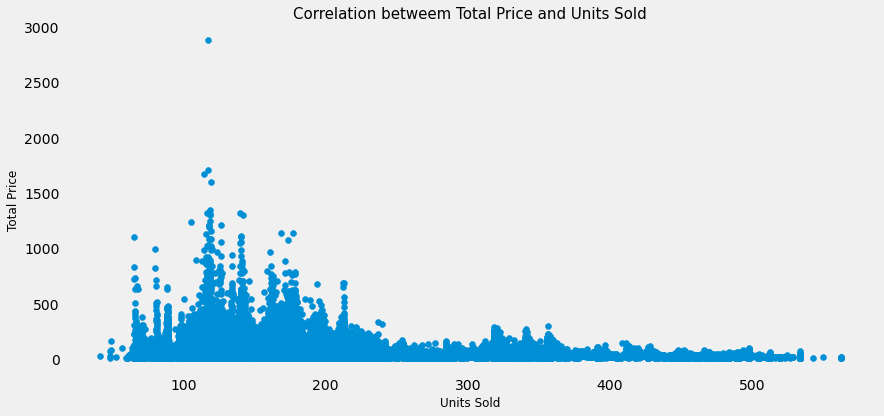

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,6))
plt.scatter(data['Total Price'], data['Units Sold'])
plt.xlabel('Units Sold',size=12)
plt.ylabel('Total Price', size=12)
plt.title('Correlation betweem Total Price and Units Sold', size=15)
plt.grid()
plt.show()

We can see that most of the data points show the sales of the product is increasing as the price is decreasing with some exceptions.

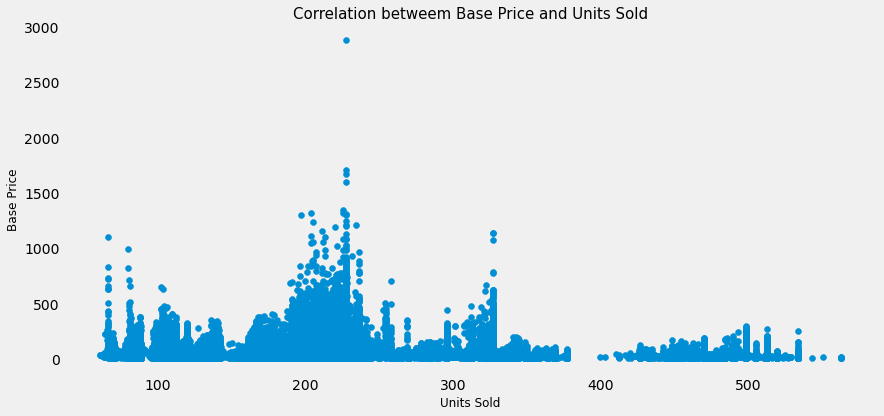

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,6))
plt.scatter(data['Base Price'], data['Units Sold'])
plt.xlabel('Units Sold',size=12)
plt.ylabel('Base Price', size=12)
plt.title('Correlation betweem Base Price and Units Sold', size=15)
plt.grid()
plt.show()

<AxesSubplot:>

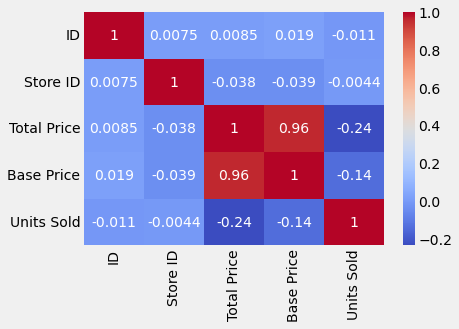

In [18]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


### The Product Demand Predicton model

In [21]:
X = data[['Total Price','Base Price']].values
Y = data['Units Sold']

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

### Train the model



In [24]:
model = DecisionTreeRegressor()

model.fit(x_train,y_train)

# predict the target

pred = model.predict(x_test)

In [25]:
model_score = model.score(x_test,y_test)

In [26]:
print(model_score)

0.326647623717114


In [27]:
# Features = [['Total Price', 'Base Price']]

features = np.array([[133.00,140.00]])
model.predict(features)

array([27.])

In [28]:
model.predict([[99.0375,111.8625]])

array([70.75])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


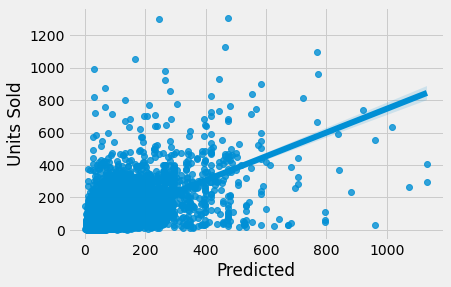

In [31]:
sns.regplot(pred,y_test)
plt.xlabel('Predicted')
plt.show()

## Using RandomForest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

## Train the model


In [ ]:
clf = RandomForestRegressor(ccp_alpha=0.02)

clf.fit(x_train,y_train)



In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(clf.score(x_test,y_test))